<a href="https://colab.research.google.com/github/erikrowens/Codecademy/blob/main/Final_Portfolio_Project/Final_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Portfolio Project

**Project Objectives:**
* Complete a project to add to a portfolio
* Use Git version control
* Use Jupyter Notebook to communicate findings
* Run an end-to-end data science project
* Become familiar with data science workflows

**Prerequisites:**
* Natural Language Processing
* Supervised Machine Learning
* Unsupervised Machine Learning
* Deep Learning
* Big Data

# Project Scope

## Goals
* I'd like to use the data in the restaurant score file described below to determine the following:
    * Is there a tendancy for certain post codes to score higher or lower on their inspections? In otherwords are inspections scores dependant on post code?
    * Are there features in the data that could predict the the outcome(s) of an inspection?
      * The column 'inspection_type' for example gives me the impression that when the inspection is unscheduled, there are more violations.
    * Are there sufficient features in the dataset that will allow us to predict a high or low score?

## Data
* The file "Restaurant_Scores_-_LIVES_Standard.csv" contains information from restaurant inspections by the Health Department. The file contains restaurant names, addresses, etc. as well as inspection information such as tpye, score, and violations.
* The data has been sourced from the DataSF website - the San Francisco, California Open Data program: https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0
* Additional information about the data can be found at the following links:
    * https://docs.google.com/document/d/1eeO5T_lt8QHGHMjpj6M9071y5OFOXcADFI4F7AIZ2iE/edit
    * https://www.yelp.com/healthscores

## Analysis
* qsdf



# Setup Environment

In [1]:
#@title Code: Import libraries
#Required to update the path statement to import a PY file from project folder
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression

#Set the path to the current project folder
#If permanently mounting via the notebook
projectFolder = './drive/My Drive/Colab Notebooks/Codecademy/Final Portfolio Project/'

#Update the path statement so that we can import our PY files for this project
sys.path.insert(1, projectFolder)

In [2]:
#@title Code: Method definitions
#Print out information about a specific column in the dataframe
def colInfo(df, column):
  print("Column: "+column)
  print(df[column].unique())
  print("Unique values:")
  tNaN = df[column].isna().sum()
  total = len(df.values)
  ptNaN = (tNaN / total)*100
  print(f"Number of unique values: {len(df[column].unique())}")
  print(f"NaN entries: {tNaN} out of {total} or {ptNaN:.2f}%")
  print("\n")

  return None

def plotScoreDistributionByPostCode(df, x, y, title, xlabel, ylabel):
  plt.figure(figsize=[30,10])

  postCodeList = list(df[x].unique())
  postCodeList.sort()

  ax = sns.violinplot(data=df, x=x, y=y, order=postCodeList)
  ax.set_title(title)
  ax.set(xlabel=xlabel, ylabel=ylabel)
  plt.xticks(rotation=45)
  
  plt.savefig(projectFolder+"score_disti_by_post_code.png", format="png")

  plt.show()

  return None

# Data Load & Inspection

In [3]:
#@title Code: Import Data
scoresDF = pd.read_csv(projectFolder+"Restaurant_Scores_-_LIVES_Standard.csv", header=0, delimiter=";")
scoresDF.head(10)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,101192_20190606,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79804,CurveBall,428 11th St,San Francisco,CA,94103,NaN,NaN,NaN,1.415029e+10,79804_20190325,03/25/2019 12:00:00 AM,NaN,Structural Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78070,Uno Dos Taco,595 Market St Suite 160,San Francisco,CA,94105,NaN,NaN,NaN,NaN,78070_20190711,07/11/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95071,95071 Portable 1 Doggie Diner,24 Willie Mays Pl Section 106,San Francisco,CA,94107,NaN,NaN,NaN,NaN,95071_20190412,04/12/2019 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83612,Lobster ME,845 Market St FE15,San Francisco,CA,94103,NaN,NaN,NaN,NaN,83612_20190725,07/25/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,NaN,NaN,NaN,NaN,101084_20190807,08/07/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,97199,ENHYDRA,PIER 43 1/2,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97199_20180925,09/25/2018 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5982,SF Senior Center at Aquatic Park Meals Program,890 Beach St,San Francisco,CA,94109,37.806258,-122.423704,"(37.806258, -122.423704)",NaN,5982_20190514,05/14/2019 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,32.0,1.0,1.0,5.0,"28,858",32.0
8,93835,Japanese House,480 6th St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,93835_20190312,03/12/2019 12:00:00 AM,82.0,Routine - Unscheduled,93835_20190312_103150,Improper or defective plumbing,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
9,91232,Castro Ice Cream,451 Castro St,San Francisco,CA,94114,NaN,NaN,NaN,1.415588e+10,91232_20190214,02/14/2019 12:00:00 AM,NaN,Non-inspection site visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#@title Code: Inspect Data

print(scoresDF.info())

_ = [colInfo(scoresDF, c) for c in ['business_postal_code', 'inspection_id'\
                                    , 'inspection_type', 'violation_id',\
                                    'risk_category', 'inspection_score']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52787 non-null  object 
 6   business_latitude          27475 non-null  float64
 7   business_longitude         27475 non-null  float64
 8   business_location          27475 non-null  object 
 9   business_phone_number      17672 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           39541 non-null  float64
 13  inspection_type            53973 non-null  obj

In [5]:
#@title Code: Check 'inspection_id' for duplicates
#Check for duplicates on column 'inspection_id'
print("\nNumber of duplicates rows for 'inspection_id'")
print(scoresDF.duplicated(subset=['inspection_id']).value_counts())

sampleRows = scoresDF[scoresDF['inspection_id'] == '1000_20171002']
print("\nA sample of duplicate 'inspection_id' entries:")
sampleRows


Number of duplicates rows for 'inspection_id'
True     27310
False    26663
dtype: int64

A sample of duplicate 'inspection_id' entries:


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
18134,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103161,Low risk vermin infestation,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
21809,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103154,Unclean or degraded floors walls or ceilings,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
28930,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103142,Unclean nonfood contact surfaces,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
38806,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103132,Improper thawing methods,Moderate Risk,19.0,4.0,7.0,2.0,"28,859",20.0
44753,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103139,Improper food storage,Low Risk,19.0,4.0,7.0,2.0,"28,859",20.0
47026,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103109,Unclean or unsanitary food contact surfaces,High Risk,19.0,4.0,7.0,2.0,"28,859",20.0
53647,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,"(37.755282, -122.420493)",NaN,1000_20171002,10/02/2017 12:00:00 AM,74.0,Routine - Unscheduled,1000_20171002_103103,High risk food holding temperature,High Risk,19.0,4.0,7.0,2.0,"28,859",20.0


In [6]:
#@title Code: Check 'violation_id' for duplicates
#Check for duplicates on column 'violation_id'
print("\nNumber of duplicates rows for 'violation_id'")
print(scoresDF.duplicated(subset=['violation_id']).value_counts())

sampleRows = scoresDF[scoresDF['violation_id'] == '984_20170726_103142']
print("\nA sample of duplicate 'violation_id' entries:")
sampleRows


Number of duplicates rows for 'violation_id'
False    40211
True     13762
dtype: int64

A sample of duplicate 'violation_id' entries:


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
17352,984,VANIDA THAI KITCHEN,3050 TARAVAL St,San Francisco,CA,94116,37.742086,-122.498738,"(37.742086, -122.498738)",NaN,984_20170726,07/26/2017 12:00:00 AM,65.0,Routine - Unscheduled,984_20170726_103142,Unclean nonfood contact surfaces,Low Risk,35.0,8.0,3.0,1.0,"29,491",35.0
19081,984,VANIDA THAI KITCHEN,3050 TARAVAL St,San Francisco,CA,94116,37.742086,-122.498738,"(37.742086, -122.498738)",NaN,984_20170726,07/26/2017 12:00:00 AM,65.0,Routine - Unscheduled,984_20170726_103142,Unclean nonfood contact surfaces,Low Risk,35.0,8.0,3.0,1.0,"29,491",35.0


In [7]:
#@title Code: Show duplicates for dataset
print("\nNumber of duplicates on the entire dataset:")
duplicateSeries = scoresDF.duplicated()
print(duplicateSeries.value_counts())

duplicateKeys = []
for k,v in duplicateSeries.iteritems():
  if(v == True): duplicateKeys.append(k)

print(scoresDF.iloc[duplicateKeys])


Number of duplicates on the entire dataset:
False    53930
True        43
dtype: int64
       business_id  ... Analysis Neighborhoods
1840         77427  ...                    NaN
2288         77427  ...                    NaN
2558         94187  ...                    NaN
3351         82095  ...                    NaN
7714          1832  ...                    8.0
13771         3403  ...                   21.0
15648         3403  ...                   21.0
15699         3403  ...                   21.0
16175        79069  ...                    NaN
16271        87492  ...                    NaN
16384        87492  ...                    NaN
16431        79069  ...                    NaN
16453        87492  ...                    NaN
16649        79069  ...                    NaN
16725        65012  ...                    NaN
16726        79069  ...                    NaN
16868        87492  ...                    NaN
16876        87492  ...                    NaN
16902        87492 

In [8]:
groupedDF = scoresDF.groupby('business_postal_code').inspection_id.count().reset_index()
print(groupedDF)

   business_postal_code  inspection_id
0                 00000              6
1                 64110              6
2                 92672              9
3                 94013              8
4                 94014              2
..                  ...            ...
57                95122              8
58                95132              5
59                95133              4
60                   CA             13
61                   Ca             11

[62 rows x 2 columns]


## Observations of data

* General observations
  * There are 53,973 rows in the file.
  * The data is highly structured and does not require much preparation.
  * The columns 'inspection_id' and 'violation_id' contain underscore seperated values that I will likely split out to make use of (more information below in duplicates.) 'violation_id' is prepended by 'inspection_id' which is appended by the data of the inspection (in YYYYMMDD format.)
* Duplicates
  * There appears to be 43 duplicate rows in the dataset.
  * A deeper look:
    * There appears to be 13,762 duplicate rows when controlled using the column 'violation_id'. The violation_id 984_20170726_103142 shows an example of a duplicate entry.
    * The value in the column 'inspection_id' contains a unique identifier for a given inspection. However, it would appear that over half of the 53k rows contain duplicate 'inspection_id'.
    * Looking at a sample of rows from the inspection_id 1000_20171002 we see that in fact an inspection can contain multiple rows (entries) one for each of the number of violtaions (violation_id) made during the inspection.
* "Nan" values
  * There are many entries with "NaN" values. 
  * I will have to handle these entries above all for 'inspection_score', 'violation_id', and 'risk_category'
* Misc.
  * The column 'business_postal_code' contains erroneous data (such as 00000 and 941.) The data in this column will need to be tidied up.
    * All post codes in the San Francisco area are of 5 digits in length and start with '941'. Any rows that do not meet the criteria will be dropped.

# Data Preperation

In [9]:
#@title Code: Data preparation

#Drop duplicates, keep last entry
scoresDF.drop_duplicates(inplace=True, ignore_index=True, keep='last')

#Drop NaN entries
scoresDF.dropna(subset=['business_postal_code', 'inspection_score'], inplace=True)

#Filter out rows where business_postal_code does not start with 941 and whose lenght is less than 4
scoresDF = scoresDF[scoresDF['business_postal_code'].map(len) > 3]
scoresDF = scoresDF[scoresDF.business_postal_code.str.contains('^941', regex=True, na=False)]

#Now replace where the postal code has a 'sub-code' appended or where the lenght > 5
#This will simply be done by substtuting the currrent value with the first 5 digits of the current value
scoresDF.loc[:,'business_postal_code'] = scoresDF.business_postal_code.str[:5]

#check out the data for the column now
_ = [colInfo(scoresDF, c) for c in ['business_postal_code', 'inspection_score']]

Column: business_postal_code
['94107' '94103' '94116' '94102' '94122' '94105' '94118' '94104' '94132'
 '94115' '94109' '94108' '94111' '94127' '94133' '94114' '94112' '94124'
 '94110' '94123' '94117' '94121' '94134' '94131' '94101' '94158' '94130'
 '94188' '94143' '94120' '94129']
Unique values:
Number of unique values: 31
NaN entries: 0 out of 38598 or 0.00%


Column: inspection_score
[100.  82.  83.  87.  92.  98.  90.  85.  88.  86.  66.  91.  80.  77.
  78.  84.  76.  96.  81.  69.  94.  79.  67.  72.  75.  55.  63.  89.
  73.  74.  64.  54.  71.  62.  65.  70.  68.  93.  59.  60.  58.  57.
  48.  46.  61.  51.  45.]
Unique values:
Number of unique values: 47
NaN entries: 0 out of 38598 or 0.00%




# Exploratory Data Analysis (EDA)

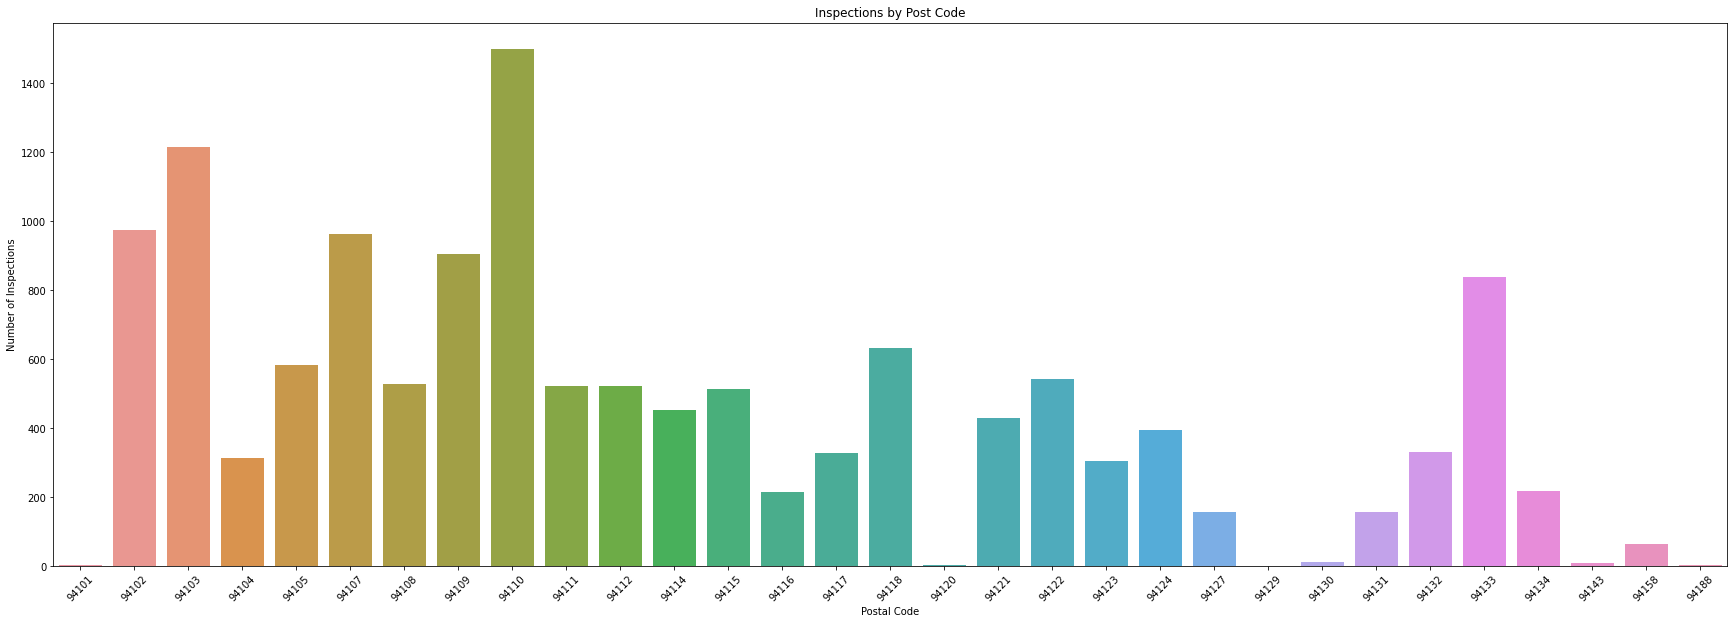

Mean number of inspections per post code = 439.94
Standard Deviation = 374.35


In [10]:
#@title Code: plot number of inspections/post code
#returns a series
inspectionCountsByPostCode = scoresDF.groupby('business_postal_code')['inspection_id'].nunique().sort_index()

plt.figure(figsize=[30,10])
ax = sns.countplot()

sns.barplot(x=inspectionCountsByPostCode.index, y=inspectionCountsByPostCode.values)
ax.set_title("Inspections by Post Code")
ax.set(xlabel='Postal Code', ylabel='Number of Inspections')
plt.xticks(rotation=45)

plt.savefig(projectFolder+"nbr_inspections_by_post_code.png", format="png")

plt.show()

meanInspectionsPerPostCode = np.mean(inspectionCountsByPostCode)
stDevInspectionsPerPostCode = np.std(inspectionCountsByPostCode)

print(f"Mean number of inspections per post code = {meanInspectionsPerPostCode:.2f}")
print(f"Standard Deviation = {stDevInspectionsPerPostCode:.2f}")

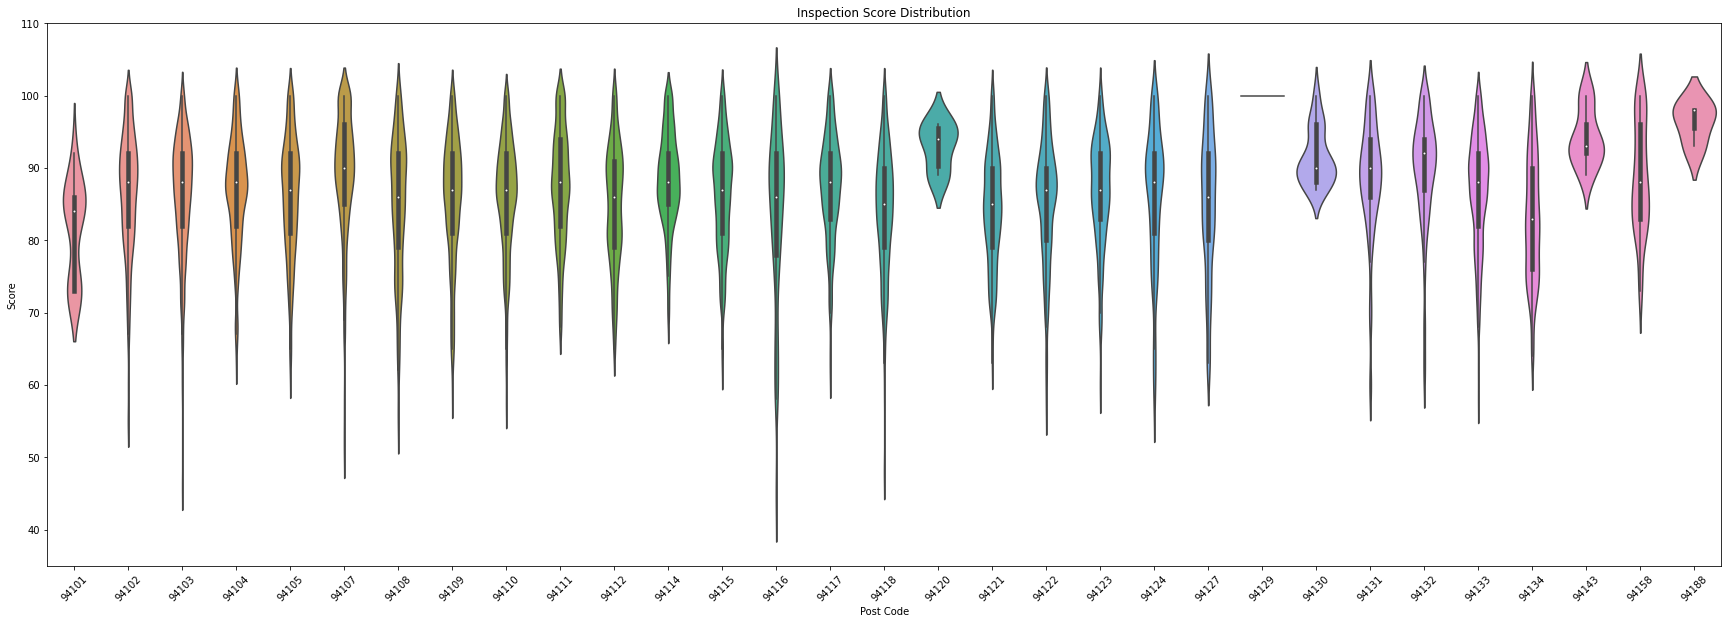

In [11]:
#@title Code: plot distribution of scores by post code
plotScoreDistributionByPostCode(scoresDF, 'business_postal_code', \
                                'inspection_score', "Inspection Score Distribution", \
                                "Post Code", "Score")

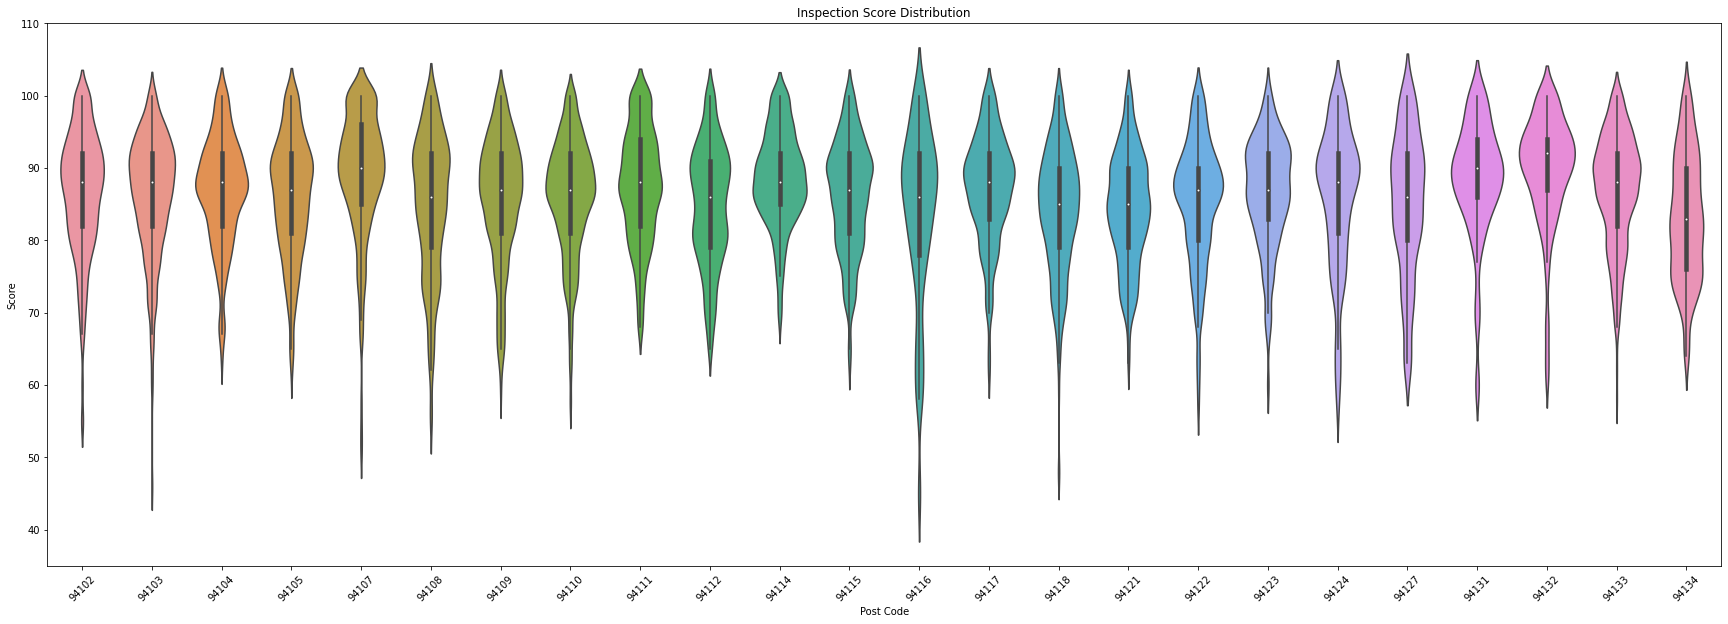

In [12]:
#@title Code: eliminate post codes with small sample sizes

#I have chosen to eliminate from the dataset any post code that is not within -1 standard deviations of the mean
#This is so that I can have only post codes with a relatively large number of samples (inspections)
postCodesToInclude = [k for k,v in inspectionCountsByPostCode.items() if v > meanInspectionsPerPostCode-stDevInspectionsPerPostCode]

#_ = [print(k, v) for k,v in inspectionCountsByPostCode.items() if k in postCodesToInclude]
scoresDF = scoresDF[scoresDF.business_postal_code.isin(postCodesToInclude)]

plotScoreDistributionByPostCode(scoresDF, 'business_postal_code', \
                                'inspection_score', "Inspection Score Distribution", \
                                "Post Code", "Score")

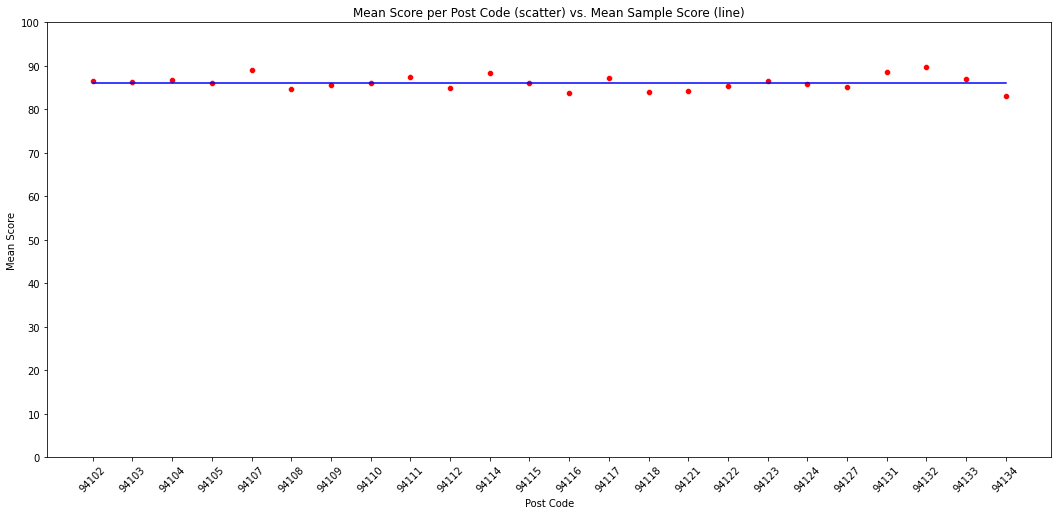

Sample Mean = 86.15
Standard Deviation of per Post Code Score Means = 1.64
Variance of per Post Code Score Means = 2.80
            Post Code              Nbr StdDev
0  94107 (mean=89.10)  1.80 stddevs from mean
1  94114 (mean=88.45)  1.40 stddevs from mean
2  94116 (mean=83.78)  1.45 stddevs from mean
3  94118 (mean=84.07)  1.27 stddevs from mean
4  94121 (mean=84.33)  1.11 stddevs from mean
5  94131 (mean=88.52)  1.45 stddevs from mean
6  94132 (mean=89.68)  2.16 stddevs from mean
7  94134 (mean=83.15)  1.83 stddevs from mean


In [13]:
#@title Code: plot Sample Mean and Mean per post Code

scoreMeansDF = scoresDF.groupby('business_postal_code').inspection_score.mean().reset_index()

#Create a list of the sample mean to plot a line
sampleMeanList = [np.mean(scoresDF['inspection_score'])] * len(scoreMeansDF)

plt.figure(figsize=[18,8])
ax = sns.lineplot(x='business_postal_code', y=sampleMeanList, data=scoreMeansDF, color='blue')
ax2 = sns.scatterplot(x='business_postal_code', y='inspection_score', data=scoreMeansDF, color='red')
#ax.set_xticklabels(ax.get_xticks())
ax.set_title("Mean Score per Post Code (scatter) vs. Mean Sample Score (line)")
ax.set(xlabel="Post Code", ylabel="Mean Score")
ax.set_xticks(range(len(scoreMeansDF['business_postal_code'])))
ax.set_yticks(range(0,101, 10))
ax.set_xticklabels(scoreMeansDF['business_postal_code'])
plt.xticks(rotation=45)

plt.savefig(projectFolder+"scoreMean_per_PostCode_vs_sampleMean.png", format="png")

plt.show()

sampleMean=np.mean(scoresDF['inspection_score'])
varianceOfPerPostCodeScoreMean=scoreMeansDF['inspection_score'].var()
stDevOfPerPostCodeScoreMean=np.std(scoreMeansDF['inspection_score'])
print(f"Sample Mean = {sampleMean:.2f}")
print(f"Standard Deviation of per Post Code Score Means = {stDevOfPerPostCodeScoreMean:.2f}")
print(f"Variance of per Post Code Score Means = {varianceOfPerPostCodeScoreMean:.2f}")

tempList = []
for e in scoreMeansDF.values[:55]:
  diff = abs(e[1]-sampleMean)
  if(diff > stDevOfPerPostCodeScoreMean):
    tempList.append([f"{e[0]} (mean={e[1]:.2f})", f"{diff/stDevOfPerPostCodeScoreMean:.2f} stddevs from mean"])

columns = ['Post Code', 'Nbr StdDev']
tempDF = pd.DataFrame(tempList,  columns=columns)
print(tempDF)

#cleanup
del tempList, tempDF

## EDA Observations
* 38,598 rows remain out of the origianl 53,973 after having performed a bit more data preparation during the EDA phase.
* Number of Inspections per Post Code
  * There are six post codes that had very few inspections: 94101, 94120, 94129, 94130, 94143, and 94188 - these post were excluded from the dataset as the scores  may not provide an accurate representation of their respective post codes.
* Distribution of scores by Post Code
  * Again we see immiately the six post codes that have few inspections performed. Thier scores are less distributed than the other post codes.
  * We see that the mean inspection score per post code have very little variance (2.80) and are all tighly grouped with the mean for the sample (86.15)

# ML
From here I will try to answer the following two question that were defined in the Project Scope
* Are there features in the data that could predict the the outcome(s) of an inspection?
* Are there sufficient features in the dataset that will allow us to predict a high or low score?



In [14]:
#@title Code: take a quick look at the DF 
scoresDF

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
3,95071,95071 Portable 1 Doggie Diner,24 Willie Mays Pl Section 106,San Francisco,CA,94107,NaN,NaN,NaN,NaN,95071_20190412,04/12/2019 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,93835,Japanese House,480 6th St,San Francisco,CA,94103,NaN,NaN,NaN,NaN,93835_20190312,03/12/2019 12:00:00 AM,82.0,Routine - Unscheduled,93835_20190312_103150,Improper or defective plumbing,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN
11,90237,Win's Restaurant,3040 Taraval St,San Francisco,CA,94116,NaN,NaN,NaN,1.415587e+10,90237_20190827,08/27/2019 12:00:00 AM,83.0,Routine - Unscheduled,90237_20190827_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
17,2589,Dojima-Ann,219 O'Farrell St,San Francisco,CA,94102,37.786363,-122.408357,"(37.786363, -122.408357)",NaN,2589_20190805,08/05/2019 12:00:00 AM,87.0,Routine - Unscheduled,2589_20190805_103142,Unclean nonfood contact surfaces,Low Risk,36.0,10.0,10.0,5.0,"28,852",36.0
21,85594,The Pearl,601 19th St,San Francisco,CA,94107,NaN,NaN,NaN,1.415527e+10,85594_20190325,03/25/2019 12:00:00 AM,92.0,Routine - Unscheduled,85594_20190325_103134,Other moderate risk violation,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,91564,Guckenheimer 1142.01,1 Market St.,San Francisco,CA,94105,NaN,NaN,NaN,NaN,91564_20190513,05/13/2019 12:00:00 AM,92.0,Routine - Unscheduled,91564_20190513_103129,Insufficient hot water or running water,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
53924,97104,FIRE AND BREW,77 JEFFERSON St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,97104_20190513,05/13/2019 12:00:00 AM,86.0,Routine - Unscheduled,97104_20190513_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
53925,85047,Guckenheimer@Google One Market,1 Market St,San Francisco,CA,94105,NaN,NaN,NaN,NaN,85047_20190513,05/13/2019 12:00:00 AM,96.0,Routine - Unscheduled,85047_20190513_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
53926,99085,RISE & GRIND,785 8TH AVE,San Francisco,CA,94118,NaN,NaN,NaN,1.415600e+10,99085_20190501,05/01/2019 12:00:00 AM,83.0,Routine - Unscheduled,99085_20190501_103109,Unclean or unsanitary food contact surfaces,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
_ = [colInfo(scoresDF, c) for c in ['inspection_type', 'violation_description', 'risk_category']]

Column: inspection_type
['Routine - Unscheduled']
Unique values:
Number of unique values: 1
NaN entries: 0 out of 38387 or 0.00%


Column: violation_description
[nan 'Improper or defective plumbing' 'High risk vermin infestation'
 'Unclean nonfood contact surfaces' 'Other moderate risk violation'
 'Permit license or inspection report not posted'
 'Unapproved or unmaintained equipment or utensils'
 'Unclean or unsanitary food contact surfaces'
 'Improper storage of equipment utensils or linens'
 'Inadequately cleaned or sanitized food contact surfaces'
 'Unpermitted food facility' 'Improper cooling methods'
 'Inadequate and inaccessible handwashing facilities'
 'Improper thawing methods' 'High risk food holding temperature'
 'Wiping cloths not clean or properly stored or inadequate sanitizer'
 'Moderate risk food holding temperature'
 'Food safety certificate or food handler card not available'
 'Foods not protected from contamination'
 'Unclean or degraded floors walls or ceilings' 'Im

# Conclusion

*************************
**Question:** Is there a tendancy for certain post codes to score higher or lower on their inspections? In otherwords are inspections scores dependant on post code?

**Answer:** No. There is very little variance amongst the per post code means of inspections scores (2.80). Furthermore, eight out of the 24 post codes are more than one standard deviation from the sample mean, only one (94132) is more than two standard deviations from the mean.

*************************
**Question:** Are there features in the data that could predict the the outcome(s) of an inspection?

**Answer:**
*************************
**Question:** Are there sufficient features in the dataset that will allow us to predict a high or low score?

**Answer:**
*************************